# Delta Flight Exploration Dataset

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools


In [78]:
delta = pd.read_csv('C:\\Users\\msasi\\Desktop\\CSC 529\\Final pRoject 29\\delta.csv')
print(delta.describe())

       Seat Width (Club)  Seat Pitch (Club)  Seat (Club)  \
count          44.000000           44.00000    44.000000   
mean            0.440909            1.00000     0.272727   
std             2.924660            6.63325     1.809068   
min             0.000000            0.00000     0.000000   
25%             0.000000            0.00000     0.000000   
50%             0.000000            0.00000     0.000000   
75%             0.000000            0.00000     0.000000   
max            19.400000           44.00000    12.000000   

       Seat Width (First Class)  Seat Pitch (First Class)  \
count                 44.000000                 44.000000   
mean                  11.488636                 21.852273   
std                   10.154120                 19.608250   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                   18.950000                 36.000000   
75%                   21.000000 

In [79]:
delta_names = delta.loc[:,'Aircraft']
print(delta_names)

0                      Airbus A319
1                  Airbus A319 VIP
2                      Airbus A320
3                 Airbus A320 32-R
4                  Airbus A330-200
5            Airbus A330-200 (3L2)
6            Airbus A330-200 (3L3)
7                  Airbus A330-300
8                       Boeing 717
9             Boeing 737-700 (73W)
10            Boeing 737-800 (738)
11            Boeing 737-800 (73H)
12          Boeing 737-900ER (739)
13            Boeing 747-400 (74S)
14            Boeing 757-200 (75A)
15            Boeing 757-200 (75E)
16            Boeing 757-200 (75M)
17            Boeing 757-200 (75N)
18            Boeing 757-200 (757)
19            Boeing 757-200 (75V)
20            Boeing 757-200 (75X)
21                  Boeing 757-300
22            Boeing 767-300 (76G)
23            Boeing 767-300 (76L)
24            Boeing 767-300 (76P)
25            Boeing 767-300 (76Q)
26            Boeing 767-300 (76T)
27            Boeing 767-300 (76U)
28        Boeing 767

In [80]:
delta.head()

,Aircraft,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
0,Airbus A319,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
1,Airbus A319 VIP,19.4,44,12,19.4,40.0,28,21.0,59.0,14,...,1,0,0,0,0,1,1,1,0,0
2,Airbus A320,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
3,Airbus A320 32-R,0.0,0,0,21.0,36.0,12,0.0,0.0,0,...,0,0,0,0,0,0,1,0,1,1
4,Airbus A330-200,0.0,0,0,0.0,0.0,0,21.0,60.0,32,...,1,1,0,1,0,0,0,1,1,1


In [81]:
delta.shape

(44, 34)

In [82]:
corr = delta.corr()

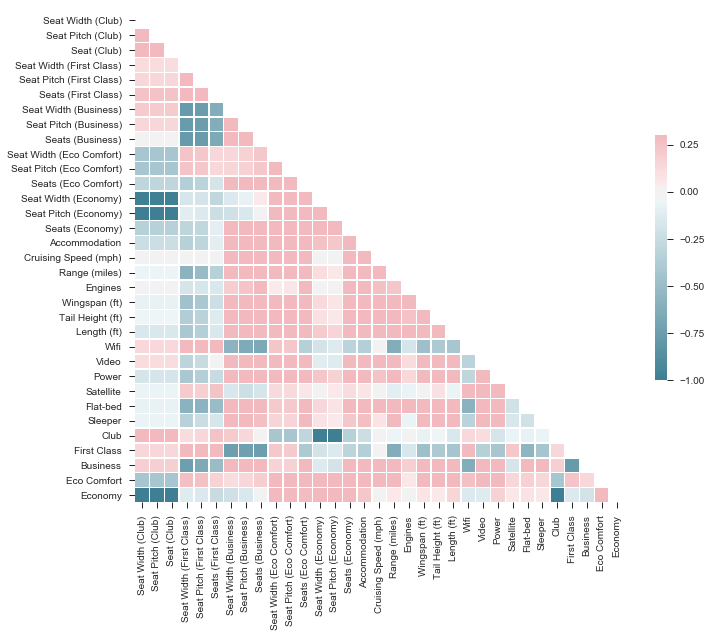

In [49]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [212]:
delta_imp = delta[['Accommodation','Cruising Speed (mph)','Range (miles)','Engines','Wingspan (ft)','Tail Height (ft)','Length (ft)']]

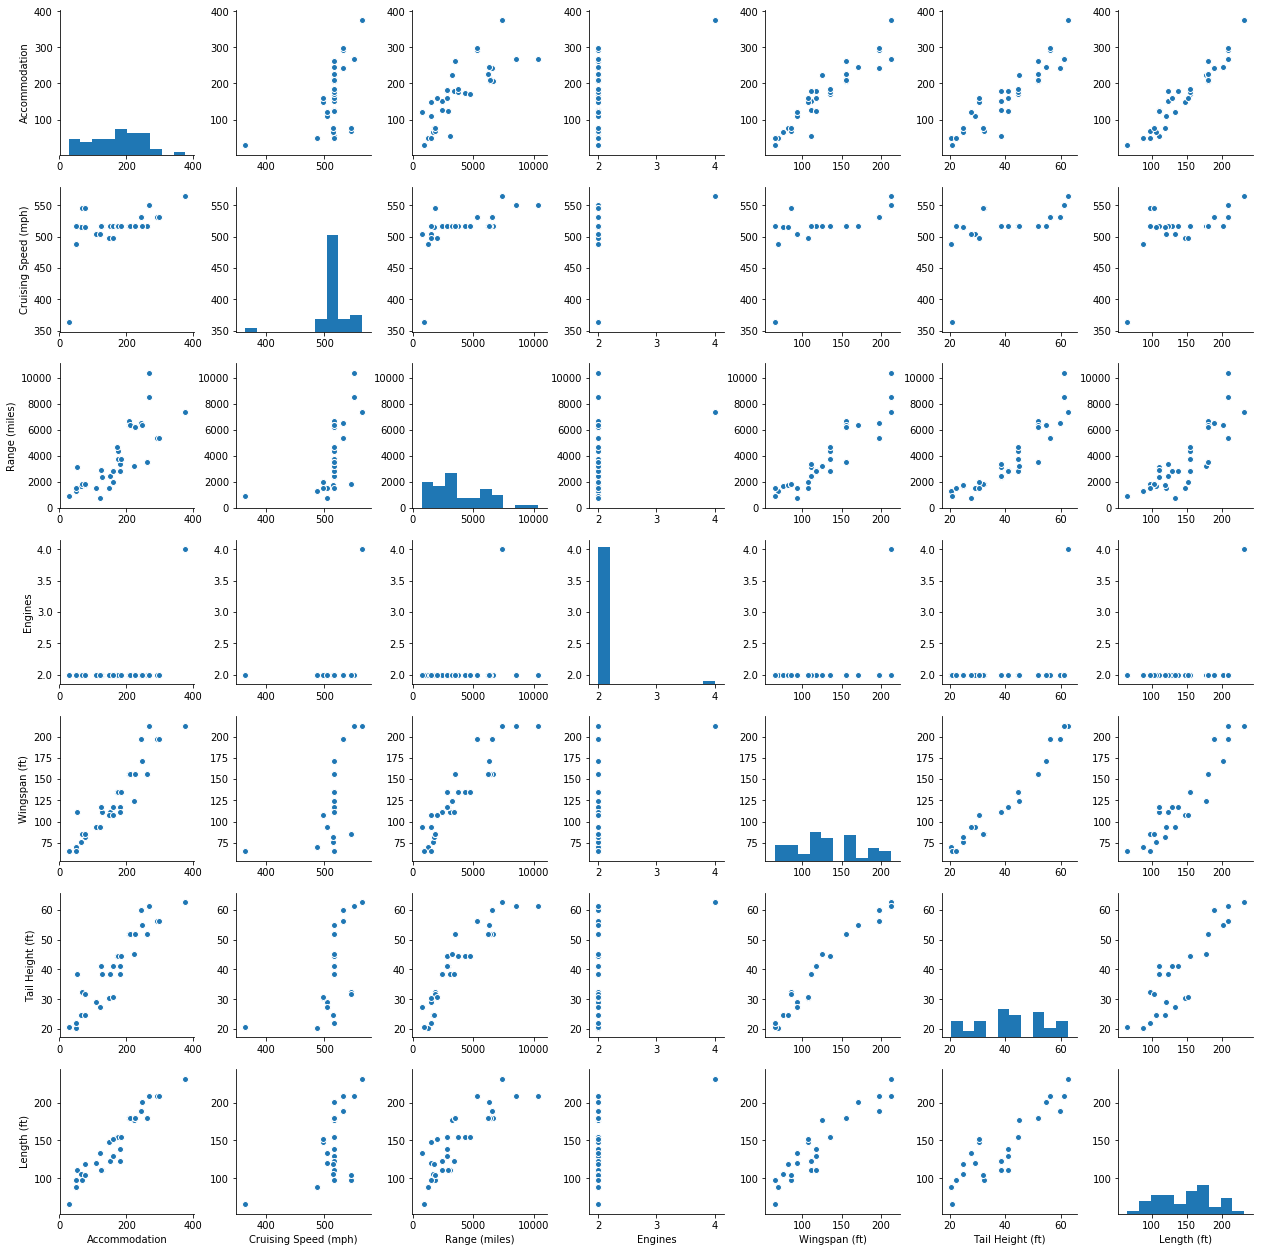

In [213]:
sns.pairplot(delta_imp)

In [83]:
#To see whether there are any missing values
(len(delta)-delta.count())/len(delta)

Aircraft                    0.0
Seat Width (Club)           0.0
Seat Pitch (Club)           0.0
Seat (Club)                 0.0
Seat Width (First Class)    0.0
Seat Pitch (First Class)    0.0
Seats (First Class)         0.0
Seat Width (Business)       0.0
Seat Pitch (Business)       0.0
Seats (Business)            0.0
Seat Width (Eco Comfort)    0.0
Seat Pitch (Eco Comfort)    0.0
Seats (Eco Comfort)         0.0
Seat Width (Economy)        0.0
Seat Pitch (Economy)        0.0
Seats (Economy)             0.0
Accommodation               0.0
Cruising Speed (mph)        0.0
Range (miles)               0.0
Engines                     0.0
Wingspan (ft)               0.0
Tail Height (ft)            0.0
Length (ft)                 0.0
Wifi                        0.0
Video                       0.0
Power                       0.0
Satellite                   0.0
Flat-bed                    0.0
Sleeper                     0.0
Club                        0.0
First Class                 0.0
Business

In [84]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
delta_noname = delta.iloc[:,1:]

In [85]:
delta_noname.head()

,Seat Width (Club),Seat Pitch (Club),Seat (Club),Seat Width (First Class),Seat Pitch (First Class),Seats (First Class),Seat Width (Business),Seat Pitch (Business),Seats (Business),Seat Width (Eco Comfort),...,Video,Power,Satellite,Flat-bed,Sleeper,Club,First Class,Business,Eco Comfort,Economy
0,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
1,19.4,44,12,19.4,40.0,28,21.0,59.0,14,0.0,...,1,0,0,0,0,1,1,1,0,0
2,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
3,0.0,0,0,21.0,36.0,12,0.0,0.0,0,17.2,...,0,0,0,0,0,0,1,0,1,1
4,0.0,0,0,0.0,0.0,0,21.0,60.0,32,18.0,...,1,1,0,1,0,0,0,1,1,1


In [86]:
col_names = list(delta_noname.columns.values)
print(col_names)

['Seat Width (Club)', 'Seat Pitch (Club)', 'Seat (Club)', 'Seat Width (First Class)', 'Seat Pitch (First Class)', 'Seats (First Class)', 'Seat Width (Business)', 'Seat Pitch (Business)', 'Seats (Business)', 'Seat Width (Eco Comfort)', 'Seat Pitch (Eco Comfort)', 'Seats (Eco Comfort)', 'Seat Width (Economy)', 'Seat Pitch (Economy)', 'Seats (Economy)', 'Accommodation', 'Cruising Speed (mph)', 'Range (miles)', 'Engines', 'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)', 'Wifi', 'Video', 'Power', 'Satellite', 'Flat-bed', 'Sleeper', 'Club', 'First Class', 'Business', 'Eco Comfort', 'Economy']


In [87]:
#scaler = MinMaxScaler(feature_range=(0, 1), copy=True)
#scaler.fit(delta_noname)
#delta_scaled = scaler.transform(delta_noname)
#delta_scaled = preprocessing.scale(delta_noname)

scaler = MinMaxScaler()
delta_noname[['Seat Width (Club)', 'Seat Pitch (Club)', 'Seat (Club)', 'Seat Width (First Class)', 'Seat Pitch (First Class)', 'Seats (First Class)', 'Seat Width (Business)', 'Seat Pitch (Business)', 'Seats (Business)', 'Seat Width (Eco Comfort)', 'Seat Pitch (Eco Comfort)', 'Seats (Eco Comfort)', 'Seat Width (Economy)', 'Seat Pitch (Economy)', 'Seats (Economy)', 'Accommodation', 'Cruising Speed (mph)', 'Range (miles)', 'Engines', 'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)', 'Wifi', 'Video', 'Power', 'Satellite', 'Flat-bed', 'Sleeper', 'Club', 'First Class', 'Business', 'Eco Comfort', 'Economy']] = scaler.fit_transform(delta_noname[['Seat Width (Club)', 'Seat Pitch (Club)', 'Seat (Club)', 'Seat Width (First Class)', 'Seat Pitch (First Class)', 'Seats (First Class)', 'Seat Width (Business)', 'Seat Pitch (Business)', 'Seats (Business)', 'Seat Width (Eco Comfort)', 'Seat Pitch (Eco Comfort)', 'Seats (Eco Comfort)', 'Seat Width (Economy)', 'Seat Pitch (Economy)', 'Seats (Economy)', 'Accommodation', 'Cruising Speed (mph)', 'Range (miles)', 'Engines', 'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)', 'Wifi', 'Video', 'Power', 'Satellite', 'Flat-bed', 'Sleeper', 'Club', 'First Class', 'Business', 'Eco Comfort', 'Economy']])

In [88]:
delta_noname.head

<bound method NDFrame.head of     Seat Width (Club)  Seat Pitch (Club)  Seat (Club)  \
0                 0.0                0.0          0.0   
1                 1.0                1.0          1.0   
2                 0.0                0.0          0.0   
3                 0.0                0.0          0.0   
4                 0.0                0.0          0.0   
5                 0.0                0.0          0.0   
6                 0.0                0.0          0.0   
7                 0.0                0.0          0.0   
8                 0.0                0.0          0.0   
9                 0.0                0.0          0.0   
10                0.0                0.0          0.0   
11                0.0                0.0          0.0   
12                0.0                0.0          0.0   
13                0.0                0.0          0.0   
14                0.0                0.0          0.0   
15                0.0                0.0          0.0   
1

In [89]:
pca = PCA(n_components=4)
pca.fit(delta_noname)
delta_noname_components = pca.transform(delta_noname)

In [99]:
#converting to dataframe
delta_noname_components_df = pd.DataFrame(delta_noname_components, columns=['PC1','PC2','PC3','PC4'] )

In [214]:
print(delta_noname_components_df)

         PC1       PC2       PC3       PC4
0  -1.297473 -0.071671 -0.222732 -0.448451
1  -0.438575  0.977240  3.192249 -0.601931
2  -1.270615 -0.105711 -0.242903 -0.454156
3  -1.270615 -0.105711 -0.242903 -0.454156
4   1.903023 -0.013237 -0.124227 -0.298139
5   1.870880 -0.021907  0.011426  0.307476
6   2.008325 -0.056027 -0.127116 -0.353174
7   1.807909 -0.074717 -0.062280  0.358642
8  -1.119321 -0.245150 -0.300782  0.032412
9  -0.828025 -0.800010  0.204787  0.757149
10 -0.832279 -0.836069  0.217813  0.760082
11 -0.808597 -0.870836  0.211602  0.747997
12 -0.759263 -0.746688  0.109855  0.256968
13  2.284878 -0.253478 -0.154027 -0.522491
14 -0.700434 -0.283159  0.008289 -0.164568
15  1.160404 -0.024406  0.171769  0.467505
16 -1.210483 -0.267644 -0.189935 -0.488081
17 -1.207257 -0.268526 -0.193545 -0.486002
18 -1.046407 -0.478446  0.163703 -0.175302
19 -0.979863 -0.572984  0.166719 -0.216681
20  1.006442 -0.183022  0.237093  0.679121
21 -0.924016 -0.611298  0.146098 -0.216239
22  1.64911

In [107]:
var= pca.explained_variance_ratio_

In [108]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

In [215]:
print(var)

[ 0.53298724  0.18660642  0.0769068   0.05839776]


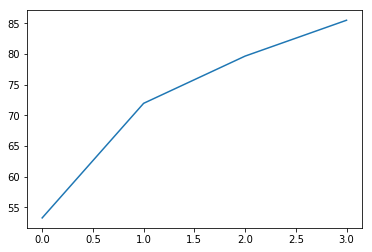

In [110]:
plt.plot(var1)

In [111]:
from sklearn.cluster import KMeans
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
%time km.fit(delta_noname)
clusters = km.labels_.tolist()

Wall time: 22.5 ms


In [62]:
delta_names_list = pd.Series.tolist(delta_names)

In [63]:
import pandas as pd

#aircrafts = { 'Aircraft': delta_names, 'cluster': clusters }
aircrafts = { 'Aircraft': delta_names_list, 'cluster': clusters }
frame = pd.DataFrame(aircrafts, index = [clusters] , columns = ['Aircraft','cluster'])

In [70]:
frame.shape

(44, 2)

In [64]:
frame['cluster'].value_counts()

1    24
0    15
3     4
2     1
Name: cluster, dtype: int64

In [65]:
result = frame.groupby(by=clusters)

In [67]:
#to print clusters
for key, item in result:
    print( result.get_group(key), "\n\n")

                   Aircraft  cluster
0           Airbus A330-200        0
0     Airbus A330-200 (3L2)        0
0     Airbus A330-200 (3L3)        0
0           Airbus A330-300        0
0      Boeing 747-400 (74S)        0
0      Boeing 757-200 (75E)        0
0      Boeing 757-200 (75X)        0
0      Boeing 767-300 (76G)        0
0      Boeing 767-300 (76L)        0
0      Boeing 767-300 (76T)        0
0  Boeing 767-300 (76Z V.1)        0
0  Boeing 767-300 (76Z V.2)        0
0      Boeing 767-400 (76D)        0
0          Boeing 777-200ER        0
0          Boeing 777-200LR        0 


                 Aircraft  cluster
1             Airbus A319        1
1             Airbus A320        1
1        Airbus A320 32-R        1
1              Boeing 717        1
1    Boeing 737-700 (73W)        1
1    Boeing 737-800 (738)        1
1    Boeing 737-800 (73H)        1
1  Boeing 737-900ER (739)        1
1    Boeing 757-200 (75A)        1
1    Boeing 757-200 (75M)        1
1    Boeing 757-200 

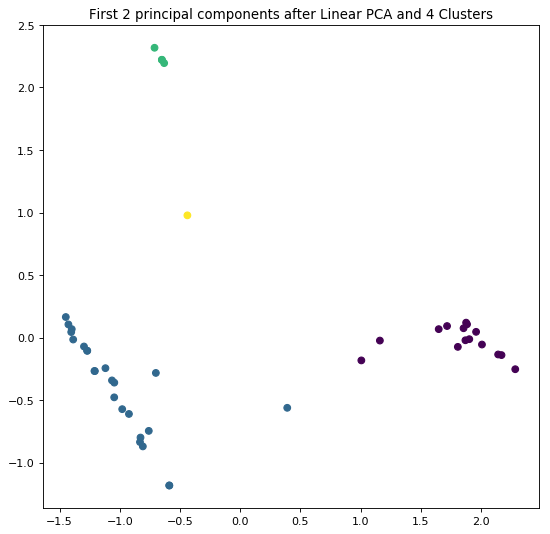

In [253]:
#to plot the clusters
y1 = km.fit_predict(delta_noname_components)
plt.figure(figsize=(8, 8), dpi=80)
plt.title('First 2 principal components after Linear PCA and 4 Clusters')
plt.scatter(delta_noname_components[:,0],delta_noname_components[:,1],c=y1)


In [119]:
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a'}

#set up cluster names using a dict
cluster_names = {0: 'Long Range', 
                 1: 'Domestic Short Range', 
                 2: 'VIP Jets', 
                 3: 'Private Jets',
                }

In [127]:
delta_noname_components.shape

(44, 4)

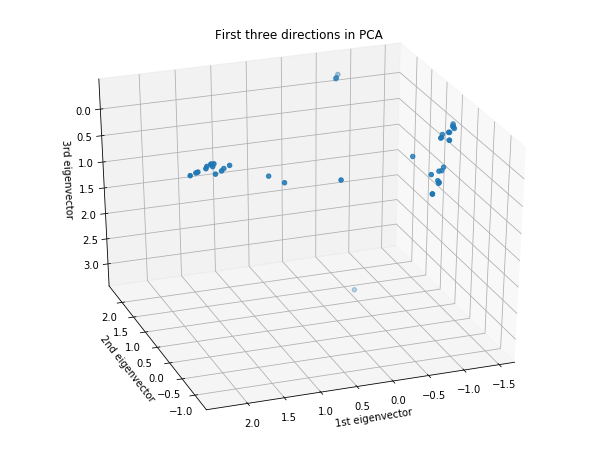

In [258]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(delta_noname_components[:, 0], delta_noname_components[:, 1], delta_noname_components[:, 2],cmap=plt.cm.Paired)
titel="First three directions in PCA"
ax.set_title(titel)
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

plt.show()

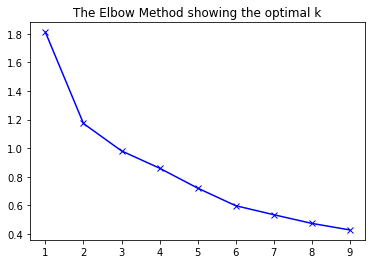

In [217]:
#Elbow mwthod to choose the optimal number of K for clusteringp
import numpy
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortion = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit(delta_noname)
    kmeans.fit(delta_noname)
    distortion.append(sum(numpy.min(cdist(delta_noname, kmeans.cluster_centers_, 'euclidean'), axis=1)) / delta_noname.shape[0])
    
plt.plot(K, distortion, 'bx-')
plt.title('The Elbow Method showing the optimal k')
plt.show()    

In [277]:
#PCA with RBF
from sklearn.decomposition import PCA, KernelPCA

kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10,n_components=4)
kpca.fit(delta_noname)
delta_noname_components_rbf = kpca.transform(delta_noname)


In [278]:
#to get the variance being explained by the components
import numpy
explained_variance = numpy.var(delta_noname_components_rbf, axis=0)
explained_variance_ratio = explained_variance / numpy.sum(explained_variance)
print(explained_variance_ratio)

[ 0.28208224  0.24786317  0.23724236  0.23281224]


In [279]:
delta_noname_components_rbf.shape

(44, 4)

In [280]:
delta_noname_components_df_rbf = pd.DataFrame(delta_noname_components_rbf, columns=['RBF-PC1','RBF-PC2','RBF-PC3','RBF-PC4'] )

In [282]:
from sklearn.cluster import KMeans
num_clusters = 4
km = KMeans(n_clusters=num_clusters)

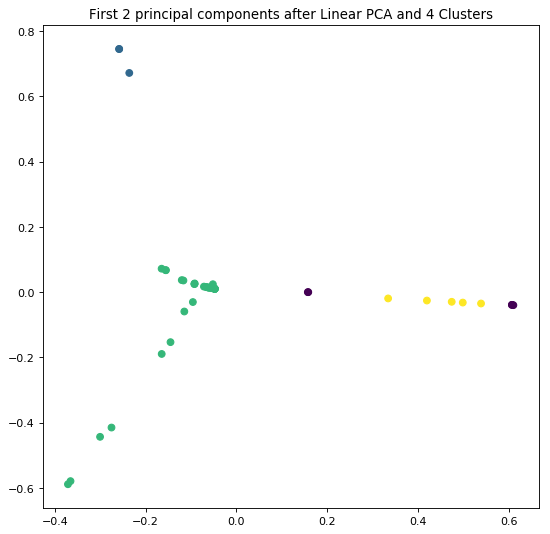

In [283]:
y1 = km.fit_predict(delta_noname_components_rbf)
plt.figure(figsize=(8, 8), dpi=80)
plt.title('First 2 principal components after Linear PCA and 4 Clusters')
plt.scatter(delta_noname_components_rbf[:,0],delta_noname_components_rbf[:,1],c=y1)


In [284]:
clusters = km.labels_.tolist()

In [285]:
import pandas as pd

#aircrafts = { 'Aircraft': delta_names, 'cluster': clusters }
aircrafts = { 'Aircraft': delta_names_list, 'cluster': clusters }
frame_rbf = pd.DataFrame(aircrafts, index = [clusters] , columns = ['Aircraft','cluster'])

In [286]:
frame_rbf['cluster'].value_counts()

2    31
3     5
0     5
1     3
Name: cluster, dtype: int64

In [287]:
result_rbf = frame_rbf.groupby(by=clusters)

In [288]:
#to print clusters
for key, item in result_rbf:
    print( result_rbf.get_group(key), "\n\n")

               Aircraft  cluster
0           Airbus A319        0
0           Airbus A320        0
0      Airbus A320 32-R        0
0  Boeing 757-200 (75M)        0
0  Boeing 757-200 (75N)        0 


                       Aircraft  cluster
1  CRJ 100/200 Pinnacle/SkyWest        1
1        CRJ 100/200 ExpressJet        1
1                       ERJ-145        1 


                   Aircraft  cluster
2           Airbus A319 VIP        2
2           Airbus A330-200        2
2     Airbus A330-200 (3L2)        2
2     Airbus A330-200 (3L3)        2
2           Airbus A330-300        2
2                Boeing 717        2
2      Boeing 737-700 (73W)        2
2      Boeing 737-800 (738)        2
2      Boeing 737-800 (73H)        2
2    Boeing 737-900ER (739)        2
2      Boeing 747-400 (74S)        2
2      Boeing 757-200 (75A)        2
2      Boeing 757-200 (75E)        2
2      Boeing 757-200 (757)        2
2      Boeing 757-200 (75V)        2
2      Boeing 757-200 (75X)        2
2  

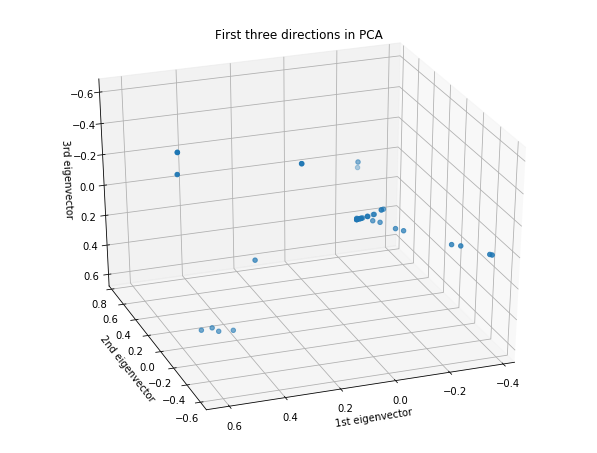

In [275]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(delta_noname_components_rbf[:, 0], delta_noname_components_rbf[:, 1], delta_noname_components_rbf[:, 2],cmap=plt.cm.Paired)
titel="First three directions in PCA"
ax.set_title(titel)
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

plt.show()

In [298]:
#Polynomial Kernel with degree 2
from sklearn.cluster import KMeans
num_clusters = 4
km = KMeans(n_clusters=num_clusters)
kpca_poly = KernelPCA(kernel="poly", gamma=10,n_components=4, degree = 2)
kpca_poly.fit(delta_noname)
delta_noname_components_poly = kpca_poly.transform(delta_noname)

In [299]:
delta_noname_components_poly.shape

(44, 4)

In [300]:
delta_noname_components_df_poly = pd.DataFrame(delta_noname_components_poly, columns=['POLY-PC1','POLY-PC2','POLY-PC3','POLY-PC4'])

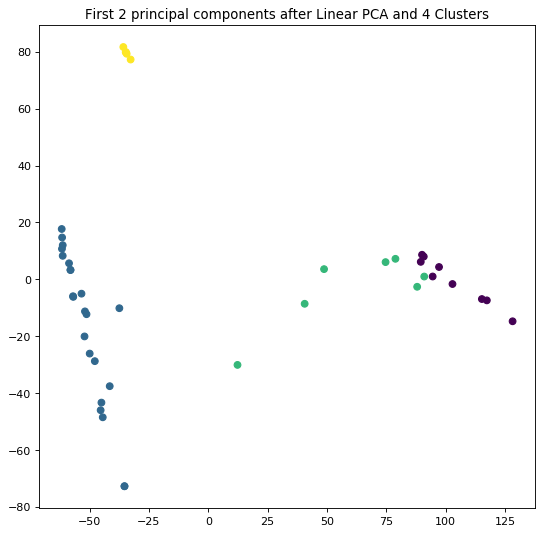

In [301]:
y1 = km.fit_predict(delta_noname_components_poly)
plt.figure(figsize=(8, 8), dpi=80)
plt.title('First 2 principal components after Linear PCA and 4 Clusters')
plt.scatter(delta_noname_components_poly[:,0],delta_noname_components_poly[:,1],c=y1)

In [307]:
clusters = km.labels_.tolist()

In [308]:
import pandas as pd

#aircrafts = { 'Aircraft': delta_names, 'cluster': clusters }
aircrafts = { 'Aircraft': delta_names_list, 'cluster': clusters }
frame_poly = pd.DataFrame(aircrafts, index = [clusters] , columns = ['Aircraft','cluster'])

In [309]:
frame_poly['cluster'].value_counts()

1    23
0     9
2     7
3     5
Name: cluster, dtype: int64

In [310]:
result_poly = frame_poly.groupby(by=clusters)

In [311]:
#to print clusters
for key, item in result_poly:
    print( result_poly.get_group(key), "\n\n")

                   Aircraft  cluster
0           Airbus A330-200        0
0     Airbus A330-200 (3L3)        0
0      Boeing 747-400 (74S)        0
0      Boeing 767-300 (76L)        0
0      Boeing 767-300 (76T)        0
0  Boeing 767-300 (76Z V.1)        0
0      Boeing 767-400 (76D)        0
0          Boeing 777-200ER        0
0          Boeing 777-200LR        0 


                 Aircraft  cluster
1             Airbus A319        1
1             Airbus A320        1
1        Airbus A320 32-R        1
1              Boeing 717        1
1    Boeing 737-700 (73W)        1
1    Boeing 737-800 (738)        1
1    Boeing 737-800 (73H)        1
1  Boeing 737-900ER (739)        1
1    Boeing 757-200 (75A)        1
1    Boeing 757-200 (75M)        1
1    Boeing 757-200 (75N)        1
1    Boeing 757-200 (757)        1
1    Boeing 757-200 (75V)        1
1          Boeing 757-300        1
1    Boeing 767-300 (76P)        1
1    Boeing 767-300 (76Q)        1
1                 CRJ 700       

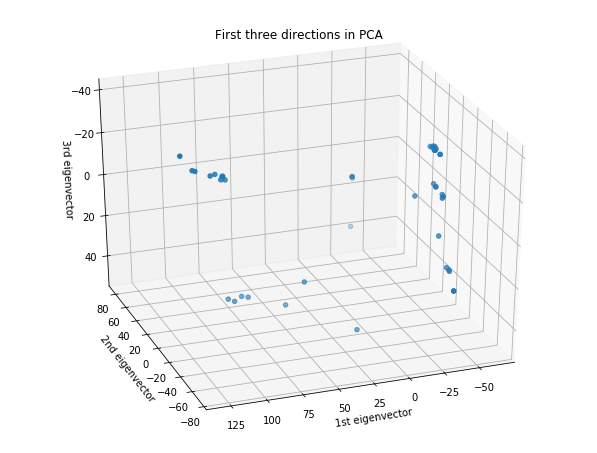

In [312]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
cluster_col = {'#1b9e77', '#d95f02', '#7570b3', '#e7298a'}
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(delta_noname_components_poly[:, 0], delta_noname_components_poly[:, 1], delta_noname_components_poly[:, 2],cmap=plt.cm.Paired)
titel="First three directions in PCA"
ax.set_title(titel)
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

plt.show()